# Object detection using Pytorch Faster R-CNN

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
plt.rcParams["savefig.bbox"] = 'tight'

## Data import & visualization

In [2]:
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path

def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

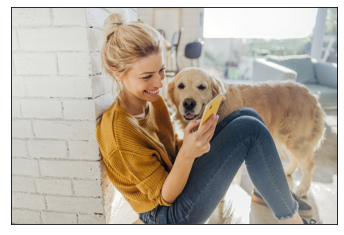

In [3]:
dog2_int = read_image(str(Path('drive/MyDrive/Computer_vision_data') / 'dog2.jpg'))

dog_list = [dog2_int]

grid = make_grid(dog_list)
show(grid)

## Model loading

In [4]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights

weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


## Input preprocessing

In [5]:
transforms = weights.transforms()
images = [transforms(d) for d in dog_list]

## Inference

In [6]:
outputs = model(images)

## Output inspection

In [ ]:
print(outputs)

In [9]:
print(len(outputs)) # 1 image

1


In [10]:
print(len(outputs[0].get('labels')))

25


In [11]:
print(len(outputs[0].get('scores')))

25


In [12]:
print(len(outputs[0].get('boxes')))

25


## Output processing

In [13]:
from torchvision.utils import draw_bounding_boxes
score_threshold = .9
def filter_model_output(output,score_threshold):
  filtred_output = list()
  for image in output:
    filtred_image = dict()
    for key in image.keys():
      filtred_image[key] = image[key][image['scores'] >= score_threshold]
    filtred_output.append(filtred_image)
  return filtred_output

In [14]:
outputs = filter_model_output(output=outputs,score_threshold=score_threshold)

## Results

In [15]:
def get_labels(prediction,weights):
  labels = list()
  labels = [weights.meta["categories"][label] for label in prediction['labels']]
  return labels

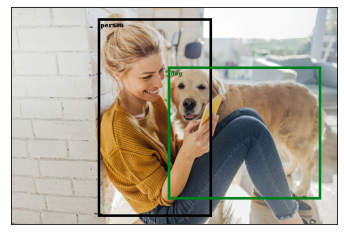

In [16]:
dogs_with_boxes = [
    draw_bounding_boxes(image, boxes=prediction['boxes'], width=4, labels=get_labels(prediction,weights))
    for image, prediction in zip(dog_list, outputs)
]
show(dogs_with_boxes)